In [1]:
#importing required modules

import keras
import numpy as np
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.utils import normalize
from tensorflow.nn import relu,softmax
from keras.utils import to_categorical


Using TensorFlow backend.


In [2]:
#spliting dataset into training data and teting data

(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

ytrain= to_categorical(ytrain)
ytest= to_categorical(ytest)

In [3]:
#scaling the pixel values between 0-1
xtrain = normalize(xtrain,axis=1)
xtest = normalize(xtest,axis=1)


In [4]:
#defining model and adding layers

model = Sequential()
model.add(Flatten())
model.add(Dense(128,activation=relu))
model.add(Dense(10,activation=softmax))

model.compile(optimizer='sgd',
              loss='kullback_leibler_divergence',
             metrics=['accuracy'])

W0809 10:28:12.763304 15188 deprecation_wrapper.py:119] From c:\users\ravin\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 10:28:12.783288 15188 deprecation_wrapper.py:119] From c:\users\ravin\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [5]:
# training the model
history=model.fit(xtrain,ytrain,epochs=3)

W0809 10:28:21.613856 15188 deprecation_wrapper.py:119] From c:\users\ravin\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 10:28:21.631637 15188 deprecation_wrapper.py:119] From c:\users\ravin\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 10:28:21.682727 15188 deprecation_wrapper.py:119] From c:\users\ravin\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:1521: The name tf.log is deprecated. Please use tf.math.log instead.

W0809 10:28:21.932633 15188 deprecation.py:323] From c:\users\ravin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is 

Epoch 1/3
60000/60000 [==============================] - 6s 92us/step - loss: 1.1251 - acc: 0.7591
Epoch 2/3
60000/60000 [==============================] - 5s 84us/step - loss: 0.4784 - acc: 0.8749
Epoch 3/3
60000/60000 [==============================] - 5s 84us/step - loss: 0.3879 - acc: 0.8935


In [6]:
# calculating the accuracy and loss

loss,accuracy= model.evaluate(xtest,ytest) 
print("Loss :",loss)
print("Accuracy : ",accuracy)

10000/10000 [==============================] - 0s 42us/step
Loss : 0.3485983126282692
Accuracy :  0.9058


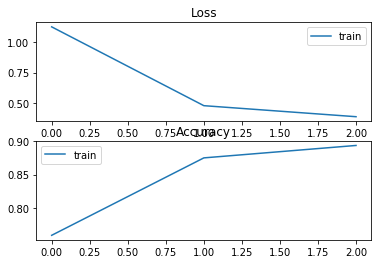

In [8]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.legend()
plt.show()

In [9]:
#prediction

predict = model.predict([xtest])
print(np.argmax(predict[5]))

1


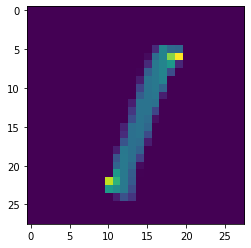

In [10]:
import matplotlib.pyplot as plt

plt.imshow(xtest[5])
plt.show()